In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [3]:
# Step 1: Load Dataset
data = pd.read_csv('loan_data.csv')

In [4]:
# Display basic information about the dataset
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (614, 8)


,Loan_ID,ApplicantIncome,LoanAmount,Credit_History,Self_Employed,Property_Area,Loan_Amount_Term,Loan_Status
0,LP001002,5849,NaN,1.0,No,Urban,360.0,Y
1,LP001003,4583,128.0,1.0,No,Rural,360.0,N
2,LP001005,3000,66.0,1.0,Yes,Urban,360.0,Y
3,LP001006,2583,120.0,1.0,No,Urban,360.0,Y
4,LP001008,6000,141.0,1.0,No,Urban,360.0,Y


In [5]:
# Step 3: Data Exploration
# Check for missing values
data.isnull().sum()



Loan_ID              0
ApplicantIncome      0
LoanAmount          22
Credit_History      50
Self_Employed       32
Property_Area        0
Loan_Amount_Term    14
Loan_Status          0
dtype: int64

In [6]:
# Get basic statistics
data.describe()

,ApplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term
count,614.000000,592.000000,564.000000,600.00000
mean,5403.459283,146.412162,0.842199,342.00000
std,6109.041673,85.587325,0.364878,65.12041
min,150.000000,9.000000,0.000000,12.00000
25%,2877.500000,100.000000,1.000000,360.00000
50%,3812.500000,128.000000,1.000000,360.00000
75%,5795.000000,168.000000,1.000000,360.00000
max,81000.000000,700.000000,1.000000,480.00000


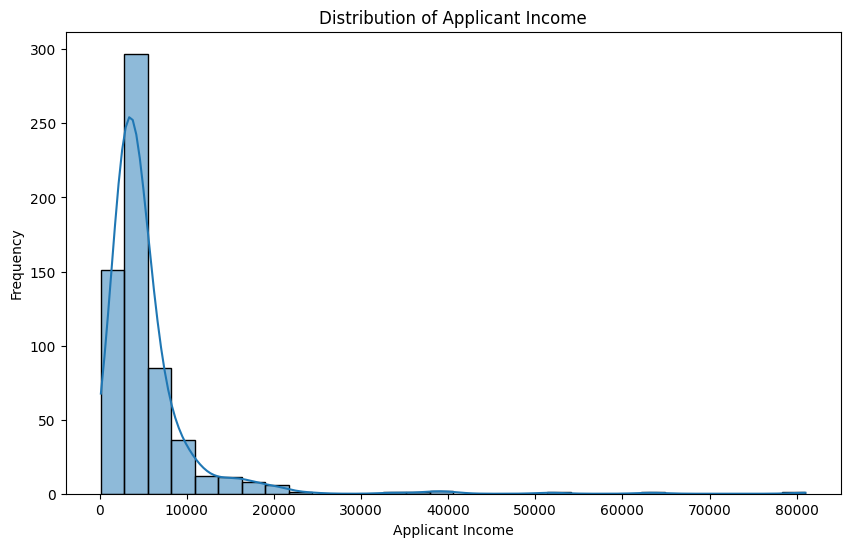

In [ ]:
# Step 4: Visualize the Data
# 1. Distribution of Applicant Income
plt.figure(figsize=(10, 6))
sns.histplot(data['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

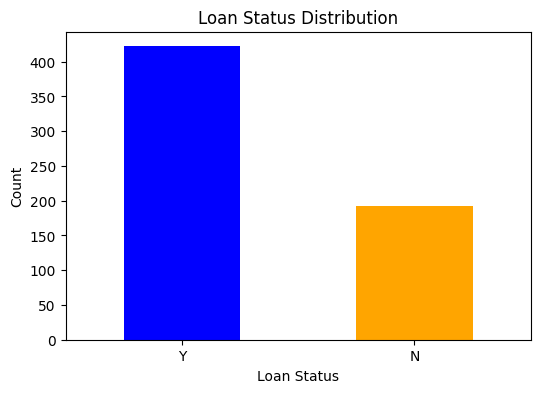

In [ ]:
# 2. Bar plot of Loan_Status
plt.figure(figsize=(6, 4))
data['Loan_Status'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

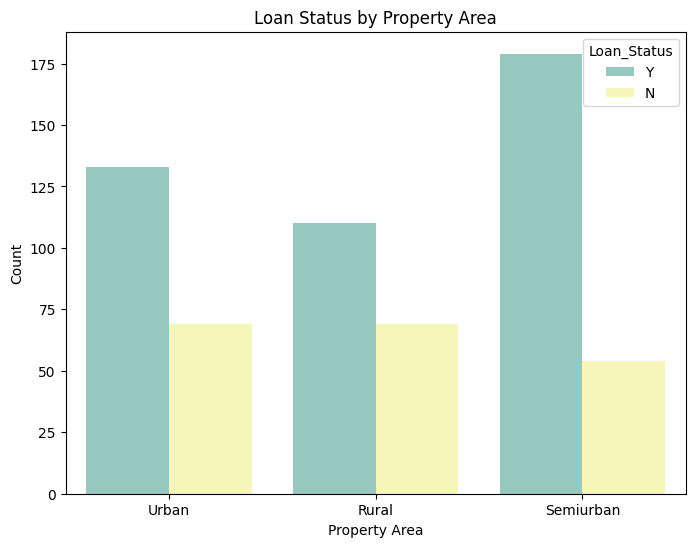

In [ ]:
# 3. Property Area vs. Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=data, palette='Set3')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

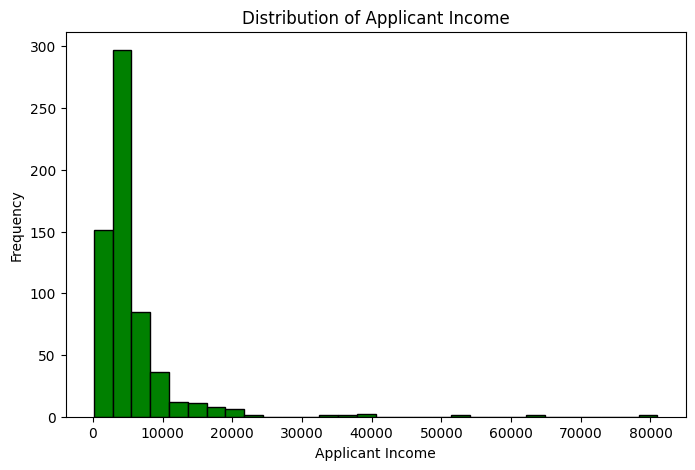

In [ ]:
# 4. Histogram of Applicant Income
plt.figure(figsize=(8, 5))
plt.hist(data['ApplicantIncome'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()


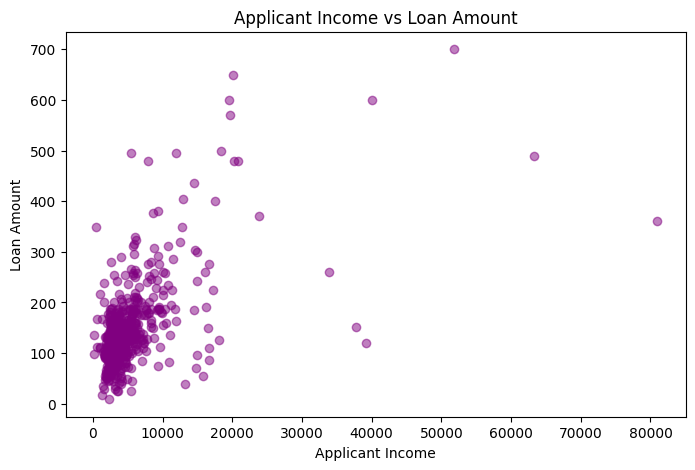

In [ ]:
# 5. Scatter plot: ApplicantIncome vs LoanAmount
plt.figure(figsize=(8, 5))
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], alpha=0.5, color='purple')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

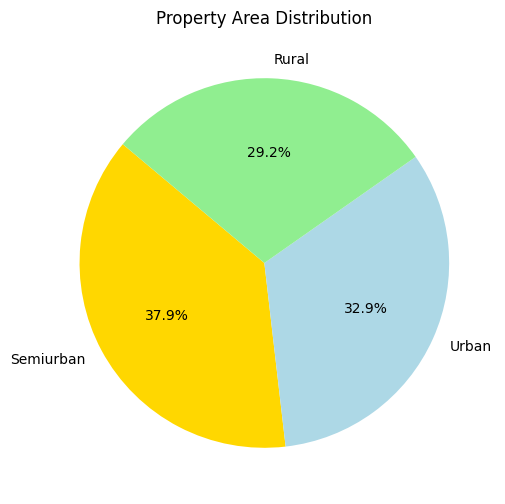

In [ ]:
# 6. Pie chart of Property Area distribution
property_area_counts = data['Property_Area'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Property Area Distribution')
plt.show()

C:\Users\kesha\AppData\Local\Temp\ipykernel_11960\571770472.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


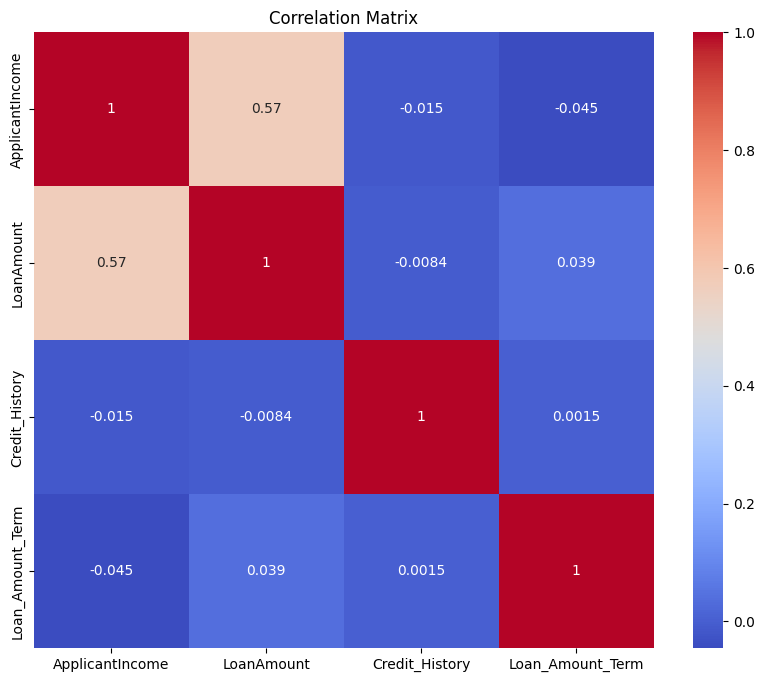

In [ ]:
# 7. Correlation Matrix
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Step 5: Data Preprocessing
# Handle missing values
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [15]:
# Encode categorical variables
data['Property_Area'] = data['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})


In [16]:
# Check if we successfully handled all missing values
print("Missing values after preprocessing:")
print(data.isnull().sum())

Missing values after preprocessing:
Loan_ID             0
ApplicantIncome     0
LoanAmount          0
Credit_History      0
Self_Employed       0
Property_Area       0
Loan_Amount_Term    0
Loan_Status         0
dtype: int64


In [17]:
# Display the preprocessed data
data.head()

,Loan_ID,ApplicantIncome,LoanAmount,Credit_History,Self_Employed,Property_Area,Loan_Amount_Term,Loan_Status
0,LP001002,5849,128.0,1.0,0,2,360.0,1
1,LP001003,4583,128.0,1.0,0,0,360.0,0
2,LP001005,3000,66.0,1.0,1,2,360.0,1
3,LP001006,2583,120.0,1.0,0,2,360.0,1
4,LP001008,6000,141.0,1.0,0,2,360.0,1


In [18]:
# Step 6: Prepare the Data for Modeling
# Split data into features (X) and target (y)
X = data.drop(columns=['Loan_Status', 'Loan_ID'])
y = data['Loan_Status']

In [19]:
# Scale numerical features
scaler = StandardScaler()
X[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(
    X[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])


In [20]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (491, 6)
Testing set shape: (123, 6)


In [22]:
# Step 7: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Step 8: Make Predictions
y_pred = model.predict(X_test)

In [24]:
# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7480

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.76      0.90      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



In [25]:
# Step 10: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)


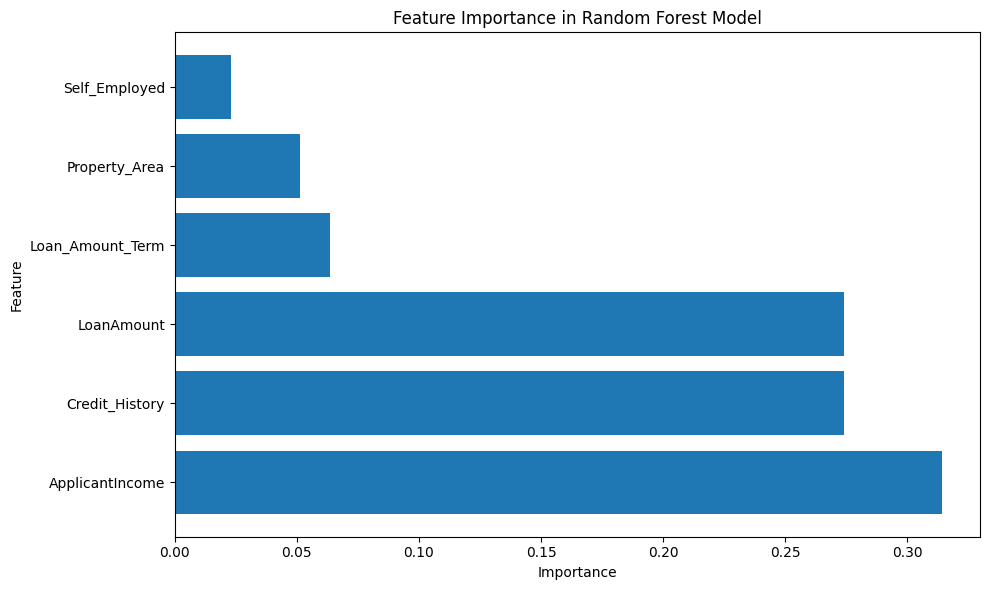

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

In [30]:
# Step 11: Save the Model for Deployment
with open('loan_eligibility_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved to loan_eligibility_model.pkl")

Model saved to loan_eligibility_model.pkl


In [31]:
# Step 12: Function to Predict Loan Eligibility for New Applicants
def predict_loan_eligibility(applicant_data):
    # Preprocess the input data (same transformations as training data)
    # Make prediction
    prediction = model.predict(applicant_data)
    return "Eligible" if prediction[0] == 1 else "Not Eligible"

In [32]:
# Example usage
print("\nExample prediction for a new applicant:")
# Create a sample applicant (values would need to be preprocessed like the training data)
sample_applicant = X_test.iloc[0:1]  # Just using the first test sample as an example
print(f"Prediction: {predict_loan_eligibility(sample_applicant)}")
print(f"Actual value: {'Eligible' if y_test.iloc[0] == 1 else 'Not Eligible'}")


Example prediction for a new applicant:
Prediction: Eligible
Actual value: Eligible
